In [31]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
import random

In [62]:
# Choose the signal frequency (0.2Hz) and the number of cycles to sample over (2) and the number of samples (50)

f_s = 0.2
N_cycles = 2.0
N_samples = 50

# Calculate the timespan
period = 1/f_s
T =  N_cycles*period

# Set the number of terms in the Fourier series (initially, equal to the number of samples, which is bad!)

N_terms = int(N_samples/2)

random.seed(1)

In [63]:
# Calculate the spacing (in time) between data points
dt = T/N_samples

# Set up arrays to hold the time (x-axis), amplitude (y-axis), and frequencies (Fourier transform)
t = np.zeros(N_samples)
y = np.zeros(N_samples)
f = np.zeros(N_terms)

yhigh = np.zeros(1000)
ylow = np.zeros(1000)
time = np.zeros(1000)

ytReal = np.zeros(N_terms)
ytImag = np.zeros(N_terms)

yfftReal = np.zeros(N_terms)
yfftImag = np.zeros(N_terms)

power = np.zeros(N_terms)
powerfft = np.zeros(N_terms)

## Theory

The function that we will choose is:

$y(t) = sin(2 \pi f_s t)$

The Fourier approximation is given by:

$y(t) \approx \frac{a_0}{2} + \sum_{n=1}^{\infty} \left ( a_n cos(\frac{2 \pi n t}{T}) + b_n sin(\frac{2 \pi n t}{T}) \right )$

where $T$ is the time-span.

For the chosen function, we expect:

$a_0 = 0$

$a_n = 0,~for~all~n$

Since we have a single sine wave with with frequency, $f_s$, we would expect one of the $b_n$ values to be non-zero, and the rest zero.  The value of n for the single non-zero $b_n$ value can be calculated from:

$2 \pi f_s = \frac{2 \pi n}{T}$

$n = T\cdot f_s = (0.2)(10.0) = 2$

Thus, we expect:

$b_2 = 1, and~all~other~b_n=0$

In [64]:
# Create the data set.  Add a little bit of random noise into the signal.

for i in range(N_samples):
    t[i]=i*dt
    y[i]=(1.0+0.00000002*random.uniform(-1,1))*np.sin(2.0*np.pi*t[i]*f_s)
    
for i in range(N_terms):
    f[i] = i/(N_terms*dt)
    
    
print (y,f,t)

[ 0.00000000e+00  2.48689891e-01  4.81753679e-01  6.84547099e-01
  8.44327925e-01  9.51056514e-01  9.98026734e-01  9.82287262e-01
  9.04827038e-01  7.70513228e-01  5.87785260e-01  3.68124552e-01
  1.25333235e-01 -1.25333231e-01 -3.68124552e-01 -5.87785258e-01
 -7.70513234e-01 -9.04827069e-01 -9.82287267e-01 -9.98026710e-01
 -9.51056498e-01 -8.44327927e-01 -6.84547118e-01 -4.81753672e-01
 -2.48689884e-01 -2.44929359e-16  2.48689882e-01  4.81753669e-01
  6.84547104e-01  8.44327925e-01  9.51056506e-01  9.98026718e-01
  9.82287240e-01  9.04827051e-01  7.70513236e-01  5.87785241e-01
  3.68124558e-01  1.25333234e-01 -1.25333234e-01 -3.68124548e-01
 -5.87785264e-01 -7.70513254e-01 -9.04827039e-01 -9.82287244e-01
 -9.98026737e-01 -9.51056524e-01 -8.44327940e-01 -6.84547104e-01
 -4.81753680e-01 -2.48689889e-01] [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8] [0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4

# Calculating the coefficients

We will determine the coefficients by numerical integration, according to:

$a_0 = \frac{2}{T} \int_0^T f(t) dt$

$a_n = \frac{2}{T} \int_0^T f(t) cos(\frac{2 \pi n}{T} t) dt$

$b_n = \frac{2}{T} \int_0^T f(t) sin(\frac{2 \pi n}{T} t) dt$

In [65]:
from timeit import default_timer as timer

start = timer()

# Define a useful constant, because I am sick of typing it so many times!

twopiT=2.0*np.pi/T

# rather than just making things exactly zero, make them a small number, so that logarithmic plots do not fail.
epsilon = 0.000001

for n in range(N_terms):
    ytReal[n]=epsilon
    ytImag[n]=epsilon
    for i in range(N_samples):
        ytReal[n] = ytReal[n] + 2.0/T*y[i]*np.cos(twopiT*n*i*dt)*dt
        ytImag[n] = ytImag[n] + 2.0/T*y[i]*np.sin(twopiT*n*i*dt)*dt  
    power[n]=(ytReal[n]**2+ytImag[n]**2)
    
end = timer()
btime = end-start
print ("Brash: ",btime)
ymaxr = max(ytReal)
ymaxi = max(ytImag)
ymax = 1.2*max(ymaxr,ymaxi)

Brash:  0.010537663009017706


In [66]:
integral = 0.0
N_real = int(N_terms)

for n in range(N_real):
    integral = integral + power[n]
print("Average Power = %.2f Watts." % (integral/2.0))

#Nyquist frequency is 1/2 the sampling rate frequency
f_nyquist = 0.5*(1.0/dt)
print("Nyquist frequency = %.2f Hz." % f_nyquist)

for i in range(1000):
    time[i] = i*T/1000.0
    ylow[i] = np.sin(2.0*np.pi*time[i]*f_s)
    yhigh[i] = -np.sin(2.0*np.pi*time[i]*(2.0*f_nyquist-f_s))


Average Power = 0.50 Watts.
Nyquist frequency = 2.50 Hz.


In [67]:
start = timer()
N_fft = len(y)
yfft = fft(y)
yfftReal = 2.0/N_fft*yfft.real
yfftImag = 2.0/N_fft*yfft.imag
powerfft = 4.0/N_fft**2*abs(yfft)**2
end = timer()
print ("Python: ",(end-start))
print("Ratio = ",btime/(end-start))

for i in range(N_terms):
    print (ytReal[i],yfftReal[i],ytImag[i],yfftImag[i],power[i],powerfft[i])
    

Python:  0.0004727420164272189
Ratio =  22.290515001515704
9.96215840523909e-07 -3.784159532393972e-09 1e-06 -0.0 1.9924460009107587e-12 1.4319863366608162e-17
1.0003579252581413e-06 3.579253642774524e-10 1.0019649404513671e-06 -1.9649404613508563e-09 2.0046497205204844e-12 3.989101583046863e-18
1.0001014114913165e-06 1.014115870933038e-10 1.000000998807266 -0.9999999988072665 1.00000199761653 0.999999997614533
9.992930511838055e-07 -7.069487630270018e-10 1.002456422339107e-06 -2.456422502618386e-09 2.0035054808331618e-12 6.5337880649153835e-18
1.001135681737153e-06 1.1356817672528116e-09 1.0006560087309768e-06 -6.560086751637817e-10 2.0035851010567228e-12 1.7201204583606094e-18
1.000698489257018e-06 6.984893711011412e-10 1.0008651931169357e-06 -8.651932334733779e-10 2.0031286011942793e-12 1.2364467327893867e-18
9.988550969657756e-07 -1.1449030994879074e-09 1.001224675435848e-06 -1.224675110812872e-09 2.000162355436128e-12 2.810632234261537e-18
1.0022796917115787e-06 2.2796912203103053

(-1.5, 1.5)

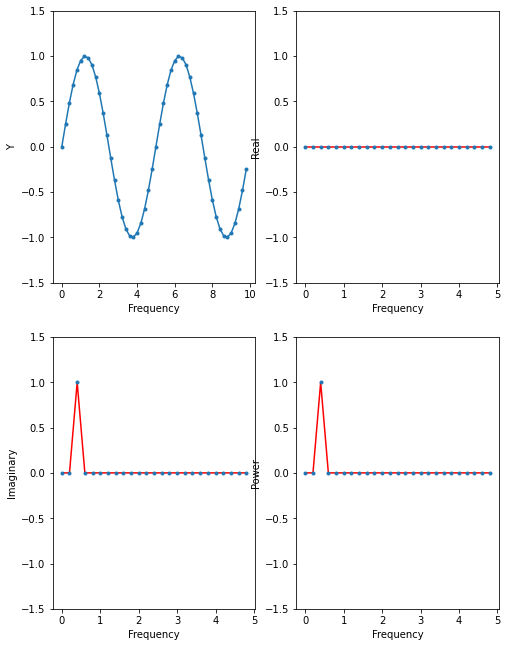

In [68]:
fig2, axs2 = plt.subplots(nrows=2, ncols=2, figsize=(8,11))

axs2[0,0].plot(t,y,'.-')
axs2[0,0].set_ylabel('Y')
axs2[0,0].set_xlabel('Frequency')
axs2[0,0].set_ylim(-1.5,1.5)

axs2[0,1].plot(f,yfftReal[0:N_terms],'r-')
axs2[0,1].plot(f,ytReal,'.')
axs2[0,1].set_ylabel('Real')
axs2[0,1].set_xlabel('Frequency')
axs2[0,1].set_ylim(-1.5,1.5)

axs2[1,0].plot(f,-yfftImag[0:N_terms],'r-')
axs2[1,0].plot(f,ytImag,'.')
axs2[1,0].set_ylabel('Imaginary')
axs2[1,0].set_xlabel('Frequency')
axs2[1,0].set_ylim(-1.5,1.5)

axs2[1,1].plot(f,powerfft[0:N_terms],'r-')
axs2[1,1].plot(f,power,'.')
axs2[1,1].set_ylabel('Power')
axs2[1,1].set_xlabel('Frequency')
axs2[1,1].set_ylim(-1.5,1.5)

(-1.2, 1.2)

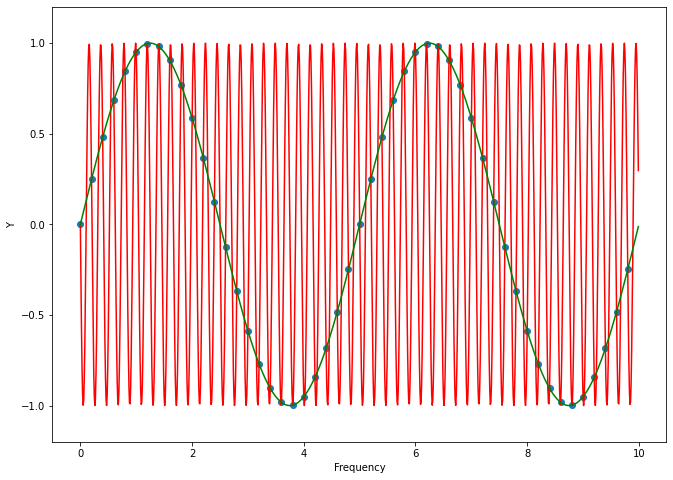

In [69]:
fig3, axs3 = plt.subplots(nrows=1, ncols=1, figsize=(11,8))

axs3.plot(t,y,'o')
axs3.plot(time,yhigh,'r-')
axs3.plot(time,ylow,'g-')
axs3.set_ylabel('Y')
axs3.set_xlabel('Frequency')
axs3.set_ylim(-1.2,1.2)